# Consolidación de la base de datos meteorológica con todas las fuentes disponibles 

## Metodología de la consolidación

## Metodología para tratamiento de los datos en esta investigación para preparar los datos para el algoritmo SARIMAX  
1. Lista de atributos o variables meteorológicas. 
     * Temperatura máxima diaria (°C)
     * Temperatura mínima diaria (°C)
     * Temperatura media diaria (°C)
     * Humedad relativa media diaria (%)
     * Humedad específica diaria (kg/kg o g/kg)
     * Velocidad del viento media diaria (m/s)
     * Velocidad del viento máxima diaria (m/s)
     * Velocidad del viento mínima diaria (m/s)
     * Precipitación diaria (mm)
     * Días con lluvia por semana epidemiológica
     * Radiación ultravioleta diaria (UV index)

2. Lista de atributos o variables Epidemiológicas.
     - Casos diarios de dengue.
        - Número de casos de dengue en Caucasia (N_Casos_Total)
        - Número de casos de dengue por barrio (N_Casos_Barrio)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

3. Obtener los datos meteorológicos: 
     - NASAPOWER

Importación de datos de la NASA POWER

In [2]:
# Importar datos
ubicacion_janis = r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos meteorológicos\NASA POWER\Datos_NS_2021-2024.csv"
ubicacion_marco = r"C:\Users\marco\OneDrive - Universidad de Antioquia\Documentos\2_recursos_ensenanza\6_datos_arima\datos_meteorologicos_2021-2024.csv"
df_nasa=pd.read_csv(ubicacion_janis, sep = ';')
df_nasa

,YEAR,DOY,T2M,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS2M,WS2M_MAX,WS2M_MIN,UV
0,2021,1,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021,2,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021,3,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021,4,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021,5,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2024,362,25.83,28.78,23.57,18.48,88.70,2.16,0.19,0.46,0.04,1.79
1457,2024,363,26.05,29.56,23.60,19.30,91.31,9.07,0.14,0.31,0.06,1.51
1458,2024,364,24.92,26.19,23.93,19.24,96.95,8.35,0.15,0.38,0.03,1.70
1459,2024,365,25.11,27.89,23.30,18.50,92.34,1.89,0.13,0.36,0.01,1.65


4. Renombrar los atributos por fuente.

In [3]:
# Renombrar columnas del dataframe nasa
df_nasa.rename(columns={
    'YEAR': 'año',
    'DOY': 'dia',
    'T2M': 'temp',
    'T2M_MAX': 'temp_max',
    'T2M_MIN': 'temp_min',
    'QV2M': 'hum_esp',
    'RH2M': 'hum_rel',
    'PRECTOTCORR': 'prec',
    'WS2M': 'vel_vi',
    'WS2M_MAX': 'vel_vi_max',
    'WS2M_MIN': 'vel_vi_min',
    'UV': 'uv'
}, inplace=True)
df_nasa

,año,dia,temp,temp_max,temp_min,hum_esp,hum_rel,prec,vel_vi,vel_vi_max,vel_vi_min,uv
0,2021,1,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021,2,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021,3,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021,4,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021,5,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2024,362,25.83,28.78,23.57,18.48,88.70,2.16,0.19,0.46,0.04,1.79
1457,2024,363,26.05,29.56,23.60,19.30,91.31,9.07,0.14,0.31,0.06,1.51
1458,2024,364,24.92,26.19,23.93,19.24,96.95,8.35,0.15,0.38,0.03,1.70
1459,2024,365,25.11,27.89,23.30,18.50,92.34,1.89,0.13,0.36,0.01,1.65


# 5. Ordenar los datos meteorológicos cronológicamente en formato DD-MM-AAAA

In [4]:
# Asegurar que las columnas 'año' y 'dia' sean numéricas 
df_nasa["año"] = df_nasa["año"].astype(int)
df_nasa["dia"] = df_nasa["dia"].astype(int)

# Crear la columna 'fecha' combinando año y día del año 
df_nasa["fecha"] = pd.to_datetime(df_nasa["año"].astype(str), format="%Y") + pd.to_timedelta(df_nasa["dia"] - 1, unit="D")

# Eliminar las columnas originales 'año' y 'dia'
df_nasa = df_nasa.drop(columns=["año", "dia"])

# Reordenar las columnas para que 'fecha' quede al inicio 
cols = ["fecha"] + [c for c in df_nasa.columns if c != "fecha"]
df_nasa = df_nasa[cols]

# Ordenar cronológicamente 
df_nasa = df_nasa.sort_values("fecha").reset_index(drop=True)

df_nasa.head()


,fecha,temp,temp_max,temp_min,hum_esp,hum_rel,prec,vel_vi,vel_vi_max,vel_vi_min,uv
0,2021-01-01,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021-01-02,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021-01-03,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021-01-04,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021-01-05,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30


6. Obtener los datos epidemiológicos

In [5]:
# Cargar datos epidemiológicos (2021-2024)
ubicacion_janis = r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Secretaria de salud\BD_DENGUE_SEC_SALUD_2021-2024.xlsx"
ubicacion_marco = r"C:\Users\marco\OneDrive - Universidad de Antioquia\Documentos\2_recursos_ensenanza\6_datos_arima\datos_epidemiologicos_2021-2024.xlsx"
df_casos = pd.read_excel(ubicacion_janis)
df_casos

,cod_eve,fec_not,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,nombre_nacionalidad,...,nom_upgd,npais_proce,ndep_proce,nmun_proce,npais_resi,ndep_resi,nmun_resi,ndep_notif,nmun_notif,nreg
0,210,2021-01-11,1,2021,515402201,1,40,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,EL BAGRE,COLOMBIA,ANTIOQUIA,EL BAGRE,ANTIOQUIA,CAUCASIA,1800
1,210,2021-02-06,5,2021,515402201,1,12,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,ZARAGOZA,COLOMBIA,ANTIOQUIA,ZARAGOZA,ANTIOQUIA,CAUCASIA,1791
2,210,2021-02-12,6,2021,2548885069,80,25,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,CUNDINAMARCA,NILO,COLOMBIA,ANTIOQUIA,CAUCASIA,SIN INFORMACIÓN,SIN INFORMACIÓN,1798
3,210,2021-02-16,3,2021,526605568,10,38,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,ENVIGADO,SIN INFORMACIÓN,SIN INFORMACIÓN,1793
4,210,2021-02-19,6,2021,526605568,10,54,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,BOGOTA,BOGOTA,SIN INFORMACIÓN,SIN INFORMACIÓN,1795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,210,2024-12-30,52,2024,515402201,1,6,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2025-01-01 00:00:00
5486,210,2024-12-31,49,2024,515415510,1,9,1,170,COLOMBIA,...,BIOMED VIDA SAS,COLOMBIA,ANTIOQUIA,ZARAGOZA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2024-12-31 00:00:00
5487,210,2024-12-31,52,2024,515415510,1,42,1,170,COLOMBIA,...,BIOMED VIDA SAS,COLOMBIA,ANTIOQUIA,MEDELLIN,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2024-12-31 00:00:00
5488,210,2024-12-31,52,2024,515403817,1,2,1,170,COLOMBIA,...,CLINICA PAJONAL LIMITADA,COLOMBIA,ANTIOQUIA,CACERES,COLOMBIA,ANTIOQUIA,CACERES,ANTIOQUIA,CAUCASIA,2025-01-07 00:00:00


# Práctica de resampling  

### **1. Definición clave:**
- **Semana epidemiológica** (según INS):
  - Comienza en **domingo** y termina en **sábado**.

### **2. Criterio recomendado para el remuestreo:**
1. **Frecuencia de agrupación:**  
   Usar `'W-SUN'` en pandas para alinear las semanas de domingo a sábado.

2. **Función de agregación:**  
   - **Para variables acumulativas** (ej: precipitación):  
     ```python
     df.resample('W-SUN').sum()
     ```
   - **Para variables promedio** (ej: temperatura):  
     ```python
     df.resample('W-SUN').mean()
     ```
   - **Para extremos** (ej: temperatura máxima):  
     ```python
     df.resample('W-SUN').max()
     ```

3. **Etiquetado de fechas:**  
   Asignar cada semana a la **fecha de inicio (domingo)** para mantener consistencia epidemiológica:
   ```python
   df_semanal = df.resample('W-SUN', label='left').sum()
   ```

---

### **3. Implementación en Python:**

In [6]:
# 1. Copiar dataframe original 
df = df_nasa.copy()

# 2. Asegurar que la columna 'fecha' es tipo datetime 
df["fecha"] = pd.to_datetime(df["fecha"])

# 3. Crear columna binaria: día con lluvia (1 si Prec ≥ 1 mm) 
df["lluvia"] = (df["prec"] >= 1).astype(int)

# 4. Definir la fecha como índice temporal 
df = df.set_index("fecha")

# 5. Remuestrear de diario a semanal (domingo a sábado) 
df_semanal = df.resample("W-SAT").agg({
    "temp": "mean",
    "temp_max": "mean",
    "temp_min": "mean",
    "hum_esp": "mean",
    "hum_rel": "mean",
    "prec": "sum",        # total semanal de precipitación
    "lluvia": "sum",             # número de días con lluvia
    "vel_vi": "mean",
    "vel_vi_max": "mean",
    "vel_vi_min": "mean",
    "uv": "mean"
})

# 6. Renombrar la nueva variable 
df_semanal = df_semanal.rename(columns={"lluvia": "dias_lluvia"})

# 7. Reiniciar índice para que 'fecha' vuelva a ser columna
df_semanal = df_semanal.reset_index()

# 8. Agregar número de semana epidemiológica
df_semanal["semana_epidemiologica"] = df_semanal["fecha"].dt.isocalendar().week

# 9. Reordenar las columnas para que la semana quede al lado de la fecha
columnas = ["fecha", "semana_epidemiologica"] + [
    col for col in df_semanal.columns if col not in ["fecha", "semana_epidemiologica"]
]
df_semanal = df_semanal[columnas]

df_semanal.head()


,fecha,semana_epidemiologica,temp,temp_max,temp_min,hum_esp,hum_rel,prec,dias_lluvia,vel_vi,vel_vi_max,vel_vi_min,uv
0,2021-01-02,53,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000
1,2021-01-09,1,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857
2,2021-01-16,2,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286
3,2021-01-23,3,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000
4,2021-01-30,4,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143


## Unión de las bases de datos

In [7]:
# Copiar los df originales
df_casos_ = df_casos.copy()
df_meteo_ = df_semanal.copy()

# Asegurar que las fechas estén en formato datetime
df_casos_["fec_not"] = pd.to_datetime(df_casos_["fec_not"])
df_meteo_["fecha"] = pd.to_datetime(df_meteo_["fecha"])

# Crear columnas de año y semana epidemiológica a partir de fec_not
df_casos_["anio"] = df_casos_["fec_not"].dt.isocalendar().year
df_casos_["semana_epidemiologica"] = df_casos_["fec_not"].dt.isocalendar().week

# Agrupar los casos por año y semana epidemiológica
df_casos_semana = (
    df_casos_
    .groupby(["anio", "semana_epidemiologica"])
    .size()
    .reset_index(name="casos_dengue")
)

# Preparar base meteorológica semanal
df_meteo_["anio"] = df_meteo_["fecha"].dt.year

# Unir ambas bases por año y semana epidemiológica
df_final = pd.merge(
    df_meteo_,
    df_casos_semana,
    on=["anio", "semana_epidemiologica"],
    how="left"
)

# Rellenar semanas sin casos con 0
df_final["casos_dengue"] = df_final["casos_dengue"].fillna(0).astype(int)

# Reordenar columnas: fecha, semana, casos, y luego las variables climáticas
columnas = ["fecha", "semana_epidemiologica", "casos_dengue"] + [
    col for col in df_final.columns if col not in ["fecha", "semana_epidemiologica", "casos_dengue", "anio"]
]

df_final = df_final[columnas]

# Ver primeras filas
df_final.head()


,fecha,semana_epidemiologica,casos_dengue,temp,temp_max,temp_min,hum_esp,hum_rel,prec,dias_lluvia,vel_vi,vel_vi_max,vel_vi_min,uv
0,2021-01-02,53,0,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000
1,2021-01-09,1,0,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857
2,2021-01-16,2,1,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286
3,2021-01-23,3,0,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000
4,2021-01-30,4,0,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143


## Prueba de normalidad

In [8]:
from scipy.stats import shapiro

# Seleccionar solo las columnas numéricas
numericas = df_final.select_dtypes(include=["float64", "int64"]) # esto elimina la fecha de lso atributos a determinar correlacion

# Aplicar Shapiro-Wilk a cada variable
resultados_normalidad = {}
for col in numericas.columns:
    stat, p = shapiro(numericas[col].dropna())
    resultados_normalidad[col] = {"Estadístico W": stat, "Valor p": p}

# Mostrar resultados
df_normalidad = pd.DataFrame(resultados_normalidad).T
df_normalidad["Normal (p>0.05)"] = df_normalidad["Valor p"] > 0.05
df_normalidad


,Estadístico W,Valor p,Normal (p>0.05)
casos_dengue,0.866598,1.312834e-12,False
temp,0.944396,3.212551e-07,False
temp_max,0.908450,4.447641e-10,False
temp_min,0.984249,1.928965e-02,False
hum_esp,0.953381,2.421801e-06,False
hum_rel,0.858170,4.743952e-13,False
prec,0.871709,2.486737e-12,False
dias_lluvia,0.902200,1.688682e-10,False
vel_vi,0.972908,4.507791e-04,False
vel_vi_max,0.943663,2.747344e-07,False


# Determinando 

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numerico = df_final.select_dtypes(include=['float64', 'int64']) # esto elimina la fecha de lso atributos a determinar correlacion

# Calcular la matriz de correlación de Spearman
corr_spearman = df_numerico.corr(method='spearman')

# Mostrar matriz en consola
print("Matriz de correlación de Spearman:\n")
corr_spearman


Matriz de correlación de Spearman:



,casos_dengue,temp,temp_max,temp_min,hum_esp,hum_rel,prec,dias_lluvia,vel_vi,vel_vi_max,vel_vi_min,uv
casos_dengue,1.000000,-0.280399,-0.350856,0.069856,0.609483,0.479109,0.263578,0.301368,0.488108,0.495731,-0.177665,-0.250364
temp,-0.280399,1.000000,0.953041,0.693237,-0.511504,-0.858971,-0.585330,-0.652843,-0.672869,-0.674555,0.261683,0.215042
temp_max,-0.350856,0.953041,1.000000,0.496170,-0.658962,-0.941632,-0.654137,-0.713499,-0.691100,-0.682460,0.262864,0.135902
temp_min,0.069856,0.693237,0.496170,1.000000,0.118330,-0.351980,-0.198456,-0.264992,-0.306470,-0.338028,0.125995,0.308971
hum_esp,0.609483,-0.511504,-0.658962,0.118330,1.000000,0.807073,0.632177,0.625998,0.613143,0.623492,-0.325117,0.041300
hum_rel,0.479109,-0.858971,-0.941632,-0.351980,0.807073,1.000000,0.723751,0.766534,0.680492,0.687327,-0.308913,-0.087301
prec,0.263578,-0.585330,-0.654137,-0.198456,0.632177,0.723751,1.000000,0.842333,0.431979,0.380206,-0.049523,0.101342
dias_lluvia,0.301368,-0.652843,-0.713499,-0.264992,0.625998,0.766534,0.842333,1.000000,0.484967,0.420471,-0.042737,0.064908
vel_vi,0.488108,-0.672869,-0.691100,-0.306470,0.613143,0.680492,0.431979,0.484967,1.000000,0.924786,-0.292704,-0.058167
vel_vi_max,0.495731,-0.674555,-0.682460,-0.338028,0.623492,0.687327,0.380206,0.420471,0.924786,1.000000,-0.491346,-0.091537


# Correlaciones de las variables meteorológicas con la variable objetivo `casos_dengue`.

In [10]:

# Mostrar correlación de cada variable con casos de dengue
print("\nCorrelación de Spearman con casos de dengue:\n")
corr_spearman['casos_dengue'].sort_values(ascending=True)



Correlación de Spearman con casos de dengue:



temp_max       -0.350856
temp           -0.280399
uv             -0.250364
vel_vi_min     -0.177665
temp_min        0.069856
prec            0.263578
dias_lluvia     0.301368
hum_rel         0.479109
vel_vi          0.488108
vel_vi_max      0.495731
hum_esp         0.609483
casos_dengue    1.000000
Name: casos_dengue, dtype: float64

Tarea: 

Redacte las interpretaciones que de estas correlaciones entre las variables predictoras y la variable objetivo (`casos_dengue`)

1. Variables de temperatura

Temperatura máxima (ρ = −0.351)
Se observa una correlación negativa moderada, lo que indica que incrementos en temperaturas máximas elevadas se asocian con una reducción en los casos de dengue. Esto puede explicarse por el estrés térmico sobre el vector, que reduce su supervivencia cuando se superan rangos óptimos.

Temperatura media (ρ = −0.280)
Presenta una correlación negativa débil a moderada, sugiriendo que aumentos sostenidos de la temperatura promedio podrían limitar la abundancia vectorial o afectar el ciclo viral.

Temperatura mínima (ρ = 0.070)
La correlación es débil y positiva, indicando una relación marginal con los casos de dengue, por lo que su efecto directo sería limitado en el periodo analizado.

2. Variables de precipitación

Precipitación acumulada (ρ = 0.264)
Muestra una correlación positiva débil, lo que sugiere que mayores volúmenes de lluvia favorecen la disponibilidad de criaderos, aunque el efecto no es determinante por sí solo.

Días de lluvia (ρ = 0.301)
Presenta una correlación positiva moderada, indicando que la frecuencia de eventos de lluvia tiene mayor relevancia epidemiológica que la cantidad total precipitada, al mantener criaderos activos de forma continua.

3. Variables de humedad

Humedad relativa (ρ = 0.479)
Exhibe una correlación positiva moderada, lo que refleja que ambientes más húmedos favorecen la supervivencia del mosquito y prolongan su actividad.

Humedad específica (ρ = 0.609)
Corresponde a la correlación positiva más alta entre las variables analizadas, lo que indica una fuerte asociación monotónica con los casos de dengue. Esta variable refleja con mayor precisión el contenido real de vapor de agua en la atmósfera, condición clave para la biología del vector.

4. Variables de viento

Velocidad mínima del viento (ρ = −0.178)
Presenta una correlación negativa débil, sugiriendo que vientos muy bajos podrían no limitar la dispersión vectorial.

Velocidad media del viento (ρ = 0.488)
Muestra una correlación positiva moderada, lo que podría relacionarse con una mayor dispersión local del vector dentro del área urbana.

Velocidad máxima del viento (ρ = 0.496)
Presenta una correlación positiva moderada, indicando que vientos más intensos, dentro de rangos no extremos, podrían facilitar la movilidad del mosquito a escala local.

5. Radiación ultravioleta

Índice UV (ρ = −0.250)
Exhibe una correlación negativa débil, lo que sugiere que niveles elevados de radiación UV pueden afectar negativamente la supervivencia del vector o la persistencia del virus en el ambiente.

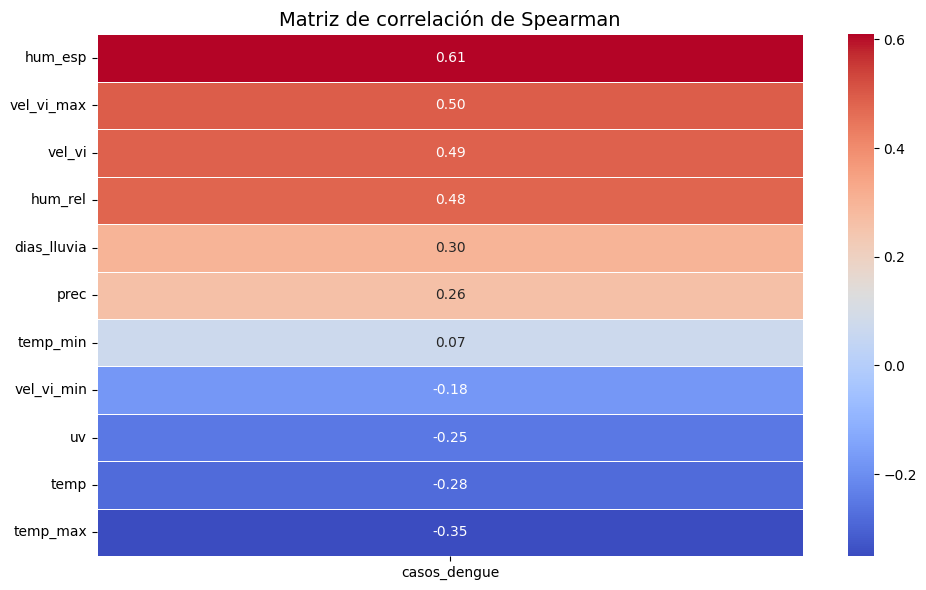

In [11]:

# Crear el mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman[['casos_dengue']].sort_values(by = 'casos_dengue' , ascending=False)[1:], 
    annot=True,       # Muestra los valores en el mapa
    cmap='coolwarm',  # Escala de color
    fmt=".2f",        # Formato de los valores
    linewidths=0.5
)
plt.title('Matriz de correlación de Spearman', fontsize=14)
plt.tight_layout()
#plt.savefig(r"C:\Users\marco\Downloads\correlacion_con_variable_objetivo.png")
plt.show()


# Determinar el número de datos faltantes 



In [12]:
df_final.isnull().sum() 

fecha                    0
semana_epidemiologica    0
casos_dengue             0
temp                     0
temp_max                 0
temp_min                 0
hum_esp                  0
hum_rel                  0
prec                     0
dias_lluvia              0
vel_vi                   0
vel_vi_max               0
vel_vi_min               0
uv                       0
dtype: int64

## Prueba AD FULLER 

In [13]:
from statsmodels.tsa.stattools import adfuller

# --- Aplicar ADF ---
resultado = adfuller(df_final["casos_dengue"])

# --- Mostrar resultados ---
print("ADF Statistic:", resultado[0])
print("p-value:", resultado[1])
print("Número de rezagos:", resultado[2])
print("Número de observaciones:", resultado[3])
print("Valores críticos:")

for key, value in resultado[4].items():
    print(f"   {key}: {value}")

# --- Conclusión ---
if resultado[1] <= 0.05:
    print("\n✔ La serie es ESTACIONARIA (no necesita diferenciación).")
else:
    print("\n✘ La serie NO es estacionaria (sí necesita diferenciación).")


ADF Statistic: 0.39790953813188673
p-value: 0.9814165974529112
Número de rezagos: 15
Número de observaciones: 194
Valores críticos:
   1%: -3.4645146202692527
   5%: -2.8765564361715534
   10%: -2.5747745328940375

✘ La serie NO es estacionaria (sí necesita diferenciación).


### Interpretación de la prueba ADF

La prueba de Dickey–Fuller aumentada (ADF) aplicada a la serie de casos de dengue arrojó un estadístico de prueba de 0.3979, valor que es mayor que los valores críticos al 1 %, 5 % y 10 % de significancia. Adicionalmente, el valor p obtenido (0.9814) es considerablemente superior al nivel de significancia convencional de 0.05, por lo que no se rechaza la hipótesis nula de presencia de raíz unitaria.

Este resultado indica que la serie presenta no estacionariedad, evidenciando la existencia de tendencia o dependencia temporal persistente. En consecuencia, la serie requiere ser diferenciada para cumplir el supuesto de estacionariedad necesario para la aplicación de modelos de series temporales del tipo ARIMA.

El modelo se evaluó utilizando 15 rezagos y un total de 194 observaciones, lo que garantiza una estimación robusta del estadístico de prueba.

In [14]:
df_final.keys()

Index(['fecha', 'semana_epidemiologica', 'casos_dengue', 'temp', 'temp_max',
       'temp_min', 'hum_esp', 'hum_rel', 'prec', 'dias_lluvia', 'vel_vi',
       'vel_vi_max', 'vel_vi_min', 'uv'],
      dtype='object')

# Rezagos

In [15]:
# Generar rezagos climáticos sin rezagos epidemiológicos

variables_climaticas = [
    'temp', 'temp_max', 'temp_min',
    'hum_esp', 'hum_rel', 'prec',
    'dias_lluvia', 'vel_vi', 'vel_vi_max',
    'vel_vi_min', 'uv'
]

for var in variables_climaticas:
    for lag in range(1, 11):       # ya modificamos a 10 semanas de rezago 
        df_final[f'{var}_lag{lag}'] = df_final[var].shift(lag)


C:\Users\usuario1\AppData\Local\Temp\ipykernel_9032\3058717347.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[f'{var}_lag{lag}'] = df_final[var].shift(lag)
C:\Users\usuario1\AppData\Local\Temp\ipykernel_9032\3058717347.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[f'{var}_lag{lag}'] = df_final[var].shift(lag)
C:\Users\usuario1\AppData\Local\Temp\ipykernel_9032\3058717347.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

In [ ]:
# Guardar el dataframe final con rezagos en excel
ubicacion_janis = r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos meteorológicos\NASA POWER"

ubicacion_marco = r"C:\Users\marco\OneDrive - Universidad de Antioquia\Documentos\2_recursos_ensenanza\6_datos_arima"

df_final.to_excel(
    ubicacion_janis + r"\Datos_meteorológicos_epidemiológicos_con_rezagos.xlsx",
    index=False
)

# Auto correlación (ACF) y Autocorrelación Parcial(PACF)

<Figure size 1000x400 with 0 Axes>

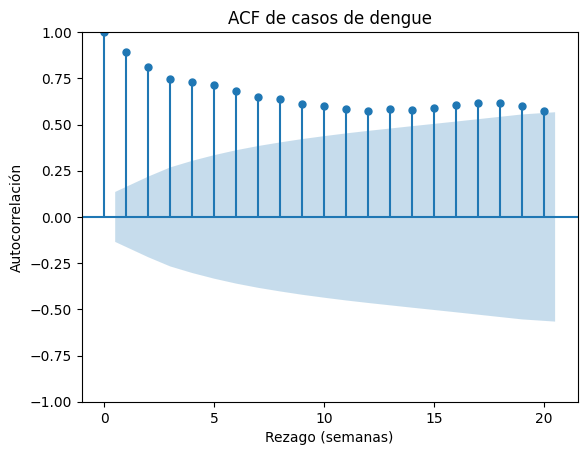

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plot_acf(df_final['casos_dengue'].dropna(), lags=20)
plt.title('ACF de casos de dengue')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Autocorrelación')
#plt.savefig(r"C:\Users\marco\Downloads\autocorrelacion.png")
plt.show()

### Interpretación

ACF (serie sin diferenciar)

La función de autocorrelación (ACF) de la serie original de casos de dengue muestra valores positivos altos y persistentes a lo largo de múltiples rezagos, con un decaimiento lento que no presenta un corte abrupto incluso después del rezago 20. Este patrón es característico de series no estacionarias, en las cuales las observaciones están fuertemente correlacionadas con sus valores pasados.

La persistencia de autocorrelaciones significativamente distintas de cero indica la presencia de tendencia o dependencia temporal de largo plazo, lo que impide la identificación directa del componente de media móvil (q) a partir de la ACF en esta etapa.


<Figure size 1000x500 with 0 Axes>

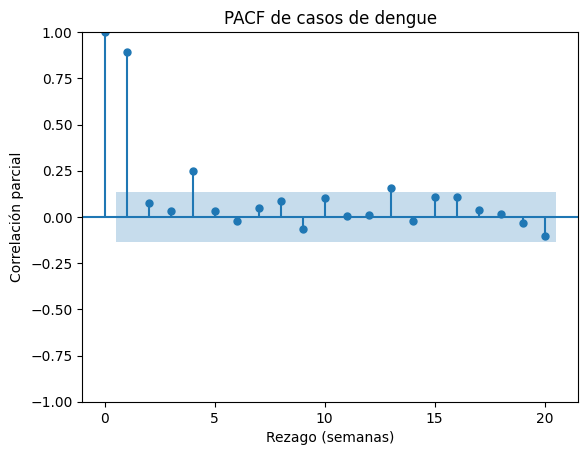

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plot_pacf(df_final['casos_dengue'].dropna(), lags=20, method='ywm')
plt.title('PACF de casos de dengue')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Correlación parcial')
#plt.savefig(r"C:\Users\marco\Downloads\correlacion_parcial.png")
plt.show()


### Interpretación

PACF (serie sin diferenciar)

La función de autocorrelación parcial (PACF) presenta un pico significativo en el primer rezago, seguido de valores que, en su mayoría, se encuentran dentro de los intervalos de confianza. Este comportamiento sugiere una fuerte dependencia inmediata entre observaciones consecutivas, pero no permite establecer con claridad un orden autorregresivo (p) debido a la no estacionariedad de la serie.

La presencia de algunos picos aislados en rezagos posteriores puede estar asociada a estructuras temporales complejas o estacionalidad, aunque su interpretación no es concluyente sin una transformación previa de la serie.


#### Que viene?

No es apropiado definir los parámetros p y q del modelo ARIMA utilizando estas funciones en su forma original.

Los patrones observados respaldan la necesidad de aplicar diferenciación de primer orden antes de proceder con la identificación de la estructura del modelo.



## Ahora hagamos las autocorrelaciones diferenciando la serie

In [19]:
# Añadir la serie diferenciada copiado del dataframe original para no perder la información de los casos de dengue sin diferenciar

# 1. Copia del dataframe original (se conserva la serie sin diferenciar)
df_final_diff = df_final.copy()

# 2. Diferenciación solo en el dataframe de trabajo
df_final_diff['casos_diff'] = df_final_diff['casos_dengue'].diff()

# 3. Visualizar
df_final_diff.head()



,fecha,semana_epidemiologica,casos_dengue,temp,temp_max,temp_min,hum_esp,hum_rel,prec,dias_lluvia,...,uv_lag2,uv_lag3,uv_lag4,uv_lag5,uv_lag6,uv_lag7,uv_lag8,uv_lag9,uv_lag10,casos_diff
0,2021-01-02,53,0,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-09,1,0,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021-01-16,2,1,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,...,2.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2021-01-23,3,0,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,...,2.222857,2.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
4,2021-01-30,4,0,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,...,2.254286,2.222857,2.33,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [20]:
df_final 

,fecha,semana_epidemiologica,casos_dengue,temp,temp_max,temp_min,hum_esp,hum_rel,prec,dias_lluvia,...,uv_lag1,uv_lag2,uv_lag3,uv_lag4,uv_lag5,uv_lag6,uv_lag7,uv_lag8,uv_lag9,uv_lag10
0,2021-01-02,53,0,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-09,1,0,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,...,2.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-16,2,1,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,...,2.222857,2.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-23,3,0,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,...,2.254286,2.222857,2.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-30,4,0,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,...,2.420000,2.254286,2.222857,2.330000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2024-12-07,49,80,26.521429,29.908571,24.115714,19.595714,90.112857,18.76,3,...,1.878571,1.811429,1.981429,1.894286,1.935714,1.907143,1.862857,1.930000,2.194286,2.464286
206,2024-12-14,50,143,26.795714,30.527143,23.571429,19.075714,86.485714,7.92,1,...,1.762857,1.878571,1.811429,1.981429,1.894286,1.935714,1.907143,1.862857,1.930000,2.194286
207,2024-12-21,51,116,26.630000,29.824286,24.062857,19.545714,89.310000,10.38,3,...,1.921429,1.762857,1.878571,1.811429,1.981429,1.894286,1.935714,1.907143,1.862857,1.930000
208,2024-12-28,52,97,26.025714,29.068571,23.940000,19.185714,90.887143,28.26,7,...,1.652857,1.921429,1.762857,1.878571,1.811429,1.981429,1.894286,1.935714,1.907143,1.862857


<Figure size 1000x400 with 0 Axes>

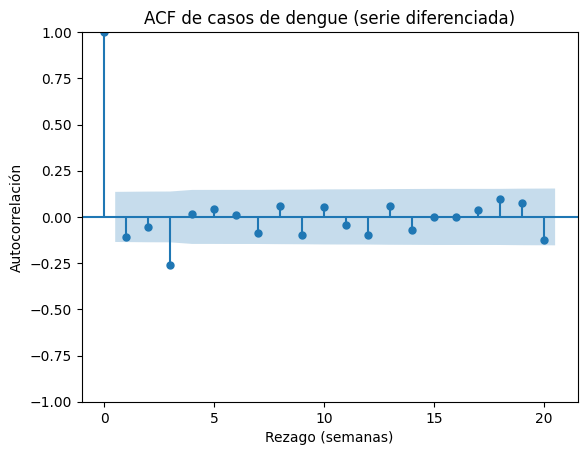

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plot_acf(df_final_diff['casos_diff'].dropna(), lags=20)
plt.title('ACF de casos de dengue (serie diferenciada)')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Autocorrelación')
plt.show()


### ACF de la serie diferenciada

Patrón observado:
- Después del rezago 0, casi todos los coeficientes están dentro de las bandas de confianza.
- Se observa un pico negativo significativo en el rezago 3.
- No hay decaimiento lento ni patrón persistente.

Interpretación:
- La diferenciación fue adecuada: la serie ya no presenta dependencia temporal fuerte ni tendencia.
- La ausencia de autocorrelaciones significativas en la mayoría de rezagos indica que la serie es aproximadamente estacionaria.
- El pico en el rezago 3 sugiere una estructura MA de bajo orden, posiblemente q = 1 o q = 3, aunque el efecto es débil.

<Figure size 1000x400 with 0 Axes>

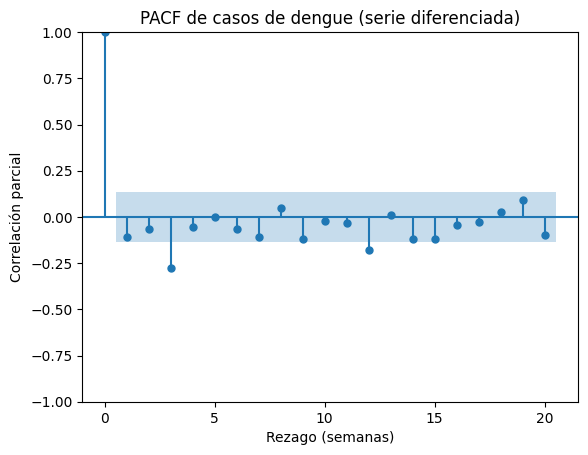

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10,4))
plot_pacf(df_final_diff['casos_diff'].dropna(), lags=20, method='ywm')
plt.title('PACF de casos de dengue (serie diferenciada)')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Correlación parcial')
plt.show()


### ACF de la serie diferenciada

Patrón observado:
- La mayoría de los rezagos están dentro de las bandas de confianza.
- Se destaca un pico negativo significativo en el rezago 3.
- No hay un corte claro y fuerte en rezagos iniciales (1 o 2).

Interpretación:
- No hay evidencia clara de una estructura autorregresiva dominante.
- El rezago 3 podría indicar un AR de bajo orden, pero el efecto no es fuerte ni persistente.
- Esto sugiere que el componente AR, si existe, sería pequeño (p = 0 o p = 1).

# Modelo ARIMA

1. Preparación de la serie (sin alterar el DF original)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Copia de trabajo
df_ts = df_final.copy()

# Asegurar formato temporal
df_ts['fecha'] = pd.to_datetime(df_ts['fecha'])
df_ts = df_ts.set_index('fecha')

# Serie original
y = df_ts['casos_dengue']


2. Ajuste de modelos ARIMA candidatos

In [24]:
from statsmodels.tsa.arima.model import ARIMA

modelos = {
    'ARIMA(0,1,1)': (0,1,1),
    'ARIMA(1,1,0)': (1,1,0),
    'ARIMA(1,1,1)': (1,1,1)
}

resultados = []

for nombre, orden in modelos.items():
    modelo = ARIMA(y, order=orden)
    ajuste = modelo.fit()
    
    resultados.append({
        'Modelo': nombre,
        'AIC': ajuste.aic,
        'BIC': ajuste.bic
    })

df_modelos = pd.DataFrame(resultados).sort_values('AIC')
df_modelos


c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\s

,Modelo,AIC,BIC
2,"ARIMA(1,1,1)",1596.034595,1606.061597
0,"ARIMA(0,1,1)",1618.997327,1625.681996
1,"ARIMA(1,1,0)",1620.574822,1627.259491


3. Ajustar el mejor modelo

(Suponiendo que gana ARIMA(0,1,1), ajusta según tu resultado)

In [25]:
modelo_final = ARIMA(y, order=(0,1,1))
ajuste_final = modelo_final.fit()

print(ajuste_final.summary())


                               SARIMAX Results                                
Dep. Variable:           casos_dengue   No. Observations:                  210
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -807.499
Date:                Tue, 10 Feb 2026   AIC                           1618.997
Time:                        00:11:08   BIC                           1625.682
Sample:                    01-02-2021   HQIC                          1621.700
                         - 01-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2471      0.065     -3.793      0.000      -0.375      -0.119
sigma2       132.8280      5.436     24.433      0.000     122.173     143.483
Ljung-Box (L1) (Q):                   0.43   Jarque-

c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
c:\Users\usuario1\Documents\GitHub\arima\.venv-1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


4. Diagnóstico del modelo

4.1 Residuos

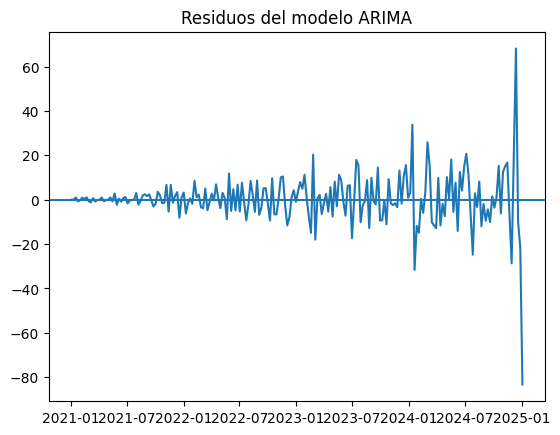

In [26]:
residuos = ajuste_final.resid

plt.figure()
plt.plot(residuos)
plt.axhline(0)
plt.title('Residuos del modelo ARIMA')
plt.show()


4.2 ACF de residuos

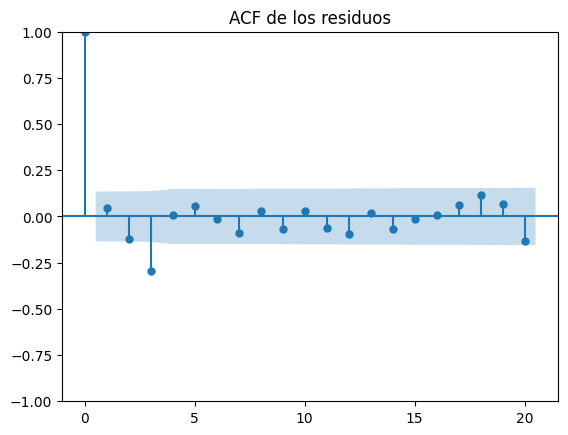

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuos, lags=20)
plt.title('ACF de los residuos')
plt.show()


4.3 Prueba de Ljung–Box

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung = acorr_ljungbox(residuos, lags=[10, 15, 20], return_df=True)
ljung


,lb_stat,lb_pvalue
10,26.483153,0.003142
15,30.491559,0.010267
20,39.840600,0.005232


5. Predicción del año 2025

5.1 Número de semanas a predecir

In [29]:
n_semanas = 52


5.2 Predicción

In [30]:
pred = ajuste_final.get_forecast(steps=n_semanas)

pred_media = pred.predicted_mean
pred_ic = pred.conf_int()


6. Gráfico: observados vs predicción

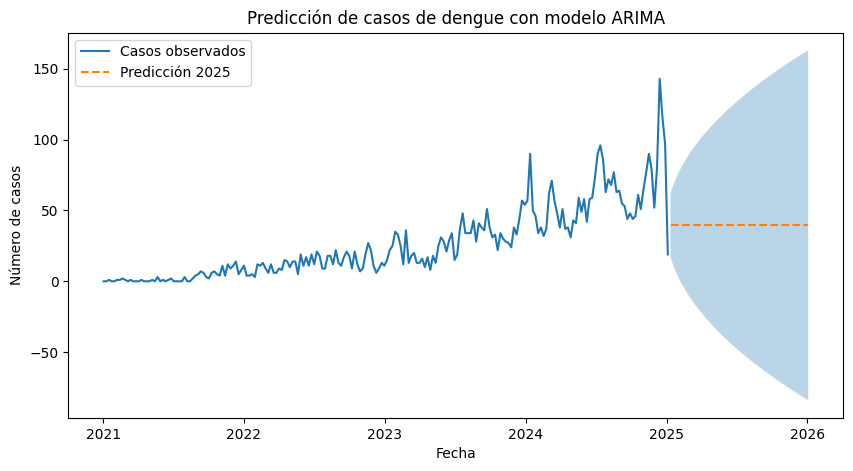

In [31]:
plt.figure(figsize=(10,5))

# Serie observada
plt.plot(y, label='Casos observados')

# Predicción
plt.plot(pred_media, label='Predicción 2025', linestyle='--')

# Intervalos de confianza
plt.fill_between(pred_ic.index,
                 pred_ic.iloc[:,0],
                 pred_ic.iloc[:,1],
                 alpha=0.3)

plt.legend()
plt.title('Predicción de casos de dengue con modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()


7. Gráfico solo de predicción (opcional para resultados)

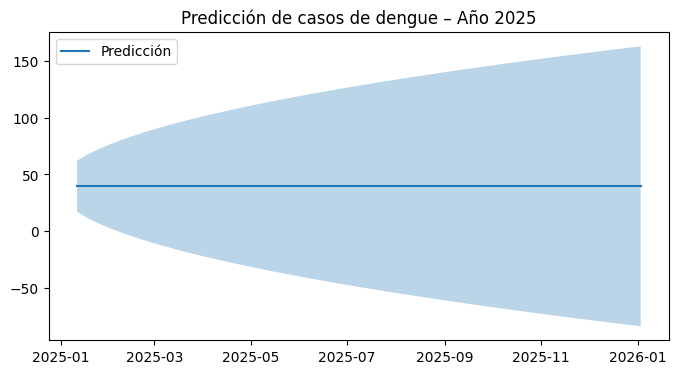

In [32]:
plt.figure(figsize=(8,4))
plt.plot(pred_media, label='Predicción')
plt.fill_between(pred_ic.index,
                 pred_ic.iloc[:,0],
                 pred_ic.iloc[:,1],
                 alpha=0.3)
plt.title('Predicción de casos de dengue – Año 2025')
plt.legend()
plt.show()


# Modelo SARIMA

# Modelo ARIMAX

# Determinación de los atributos meteorológicos con rezago mejor correlacionados con la variable objetivo 





¡Vamos a ello, Marco! 👌
La función `ccf` es **clave** cuando trabajas con **series de tiempo epidemiológicas y meteorológicas**, porque permite estudiar **relaciones temporales con desfases (rezagos)**, no solo asociaciones “simultáneas”.

---

## 📌 ¿Qué es `ccf`?

```python
from statsmodels.tsa.stattools import ccf
```

La función **`ccf` (Cross-Correlation Function)** calcula la **función de correlación cruzada** entre **dos series temporales**.

👉 Responde a la pregunta:

> ¿Cómo se relaciona la serie (x_t) con la serie (y_{t+k}) para distintos rezagos (k)?

---

## 🧠 Definición matemática (intuición)

Sean dos series estacionarias:

[
{x_t}, \quad {y_t}
]

La **correlación cruzada en el rezago (k)** es:

[
\rho_{xy}(k) = \frac{\operatorname{Cov}(x_t, y_{t+k})}
{\sqrt{\operatorname{Var}(x_t)\operatorname{Var}(y_t)}}
]

📌 `ccf(x, y)` calcula esta cantidad para **k = 0, 1, 2, …**

---

## 🧪 Uso básico en Python

```python
from statsmodels.tsa.stattools import ccf

ccf_vals = ccf(x, y)
```

* `x`: serie “causa” (por ejemplo, lluvia)
* `y`: serie “efecto” (por ejemplo, casos de dengue)

📌 **Importante**: `ccf(x, y)[k]` mide la correlación entre
[
x_t \quad \text{y} \quad y_{t+k}
]

---

## 🔍 Tipos de correlaciones que puede obtener `ccf`

Aquí viene lo importante 👇
`ccf` **no devuelve un solo tipo de correlación**, sino una **familia de correlaciones temporales**.

---

### 1️⃣ Correlación cruzada contemporánea (lag = 0)

```python
ccf(x, y)[0]
```

📌 Mide:

[
\text{corr}(x_t, y_t)
]

👉 Asociación **simultánea**, equivalente a:

* Pearson (si ambas series son lineales)
* pero **después de estandarización interna**

---

### 2️⃣ Correlación cruzada con rezago positivo (lag > 0)

```python
ccf(x, y)[k]   # k > 0
```

📌 Mide:

[
\text{corr}(x_t, y_{t+k})
]

👉 Interpretación causal **temporal**:

* `x` **precede** a `y`
* Ejemplo típico:

  * lluvia → (2–6 semanas) → dengue

🧠 **Esta es la más usada en epidemiología climática**

---

### 3️⃣ Correlación cruzada predictiva

Cuando encuentras:

```python
ccf(x, y)[k]  ≠ 0   con k > 0
```

📌 Indica que:

> (x_t) puede servir como **predictor adelantado** de (y)

✔️ Justifica:

* rezagos
* variables exógenas (ARIMAX)
* modelos de alerta temprana

---

### 4️⃣ Correlación cruzada inversa (conceptual)

Aunque `ccf` **no calcula directamente lags negativos**, conceptualmente:

[
\text{corr}(x_t, y_{t-k})
]

equivale a:

```python
ccf(y, x)[k]
```

📌 Esto permite analizar si:

* los casos de dengue “anticipan” cambios climáticos
  (lo cual usualmente no tiene sentido físico, pero sirve como control)

---

### 5️⃣ Correlación cruzada lineal estandarizada

`ccf` **siempre calcula correlación lineal**, equivalente a:

* Pearson
* con series centradas y normalizadas

📌 **No calcula**:

* Spearman
* Kendall
* correlaciones no lineales

⚠️ Si la relación es no monótona, `ccf` puede no detectarla.

---

## ⚠️ Lo que `ccf` NO hace (muy importante)

| Aspecto                   | ¿ccf lo hace? |
| ------------------------- | ------------- |
| Controlar autocorrelación | ❌             |
| Diferenciar series        | ❌             |
| Quitar tendencia          | ❌             |
| Calcular Spearman         | ❌             |
| Evaluar causalidad real   | ❌             |

👉 Por eso **debe usarse con series estacionarias**
(diferenciadas, filtradas o preblanqueadas).

---

## 🧠 Buenas prácticas (nivel investigación)

Antes de usar `ccf`:

```python
x_diff = x.diff().dropna()
y_diff = y.diff().dropna()

ccf_vals = ccf(x_diff, y_diff)
```

O incluso:

* **prewhitening**
* **modelos ARIMAX**
* **pruebas de causalidad de Granger**

---

## 🎓 Resumen conceptual

`ccf` permite estudiar:

| Tipo de correlación  | Qué mide                    |
| -------------------- | --------------------------- |
| Contemporánea        | Relación en el mismo tiempo |
| Cruzada con rezago   | Efecto retardado            |
| Predictiva           | Capacidad de anticipación   |
| Inversa (conceptual) | Dirección temporal          |
| Lineal estandarizada | Asociación lineal           |

---

Si quieres, en el siguiente paso puedo:

* construir un **ejemplo completo con datos de dengue y lluvia**,
* mostrar **cómo elegir el rezago óptimo**,
* o comparar `ccf` con **Granger, ARIMAX y Random Forest con lags**.


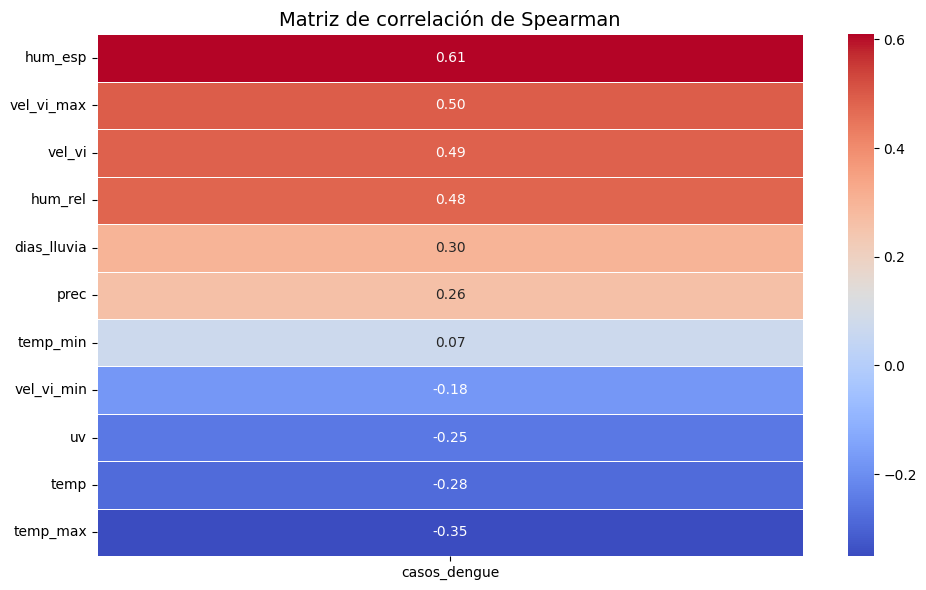

In [29]:
# Crear el mapa de calor
plt.figure(figsize=(10,6))

sns.heatmap(corr_spearman[['casos_dengue']].sort_values(by = 'casos_dengue' , ascending=False)[1:], 
    annot=True,       # Muestra los valores en el mapa
    cmap='coolwarm',  # Escala de color
    fmt=".2f",        # Formato de los valores
    linewidths=0.5
)
plt.title('Matriz de correlación de Spearman', fontsize=14)
plt.tight_layout()
#plt.savefig(r"C:\Users\marco\Downloads\correlacion_con_variable_objetivo.png")
plt.show()


CCF

# Seleccion de las variables exógenas 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Lista de variables climáticas (ajusta si cambias nombres)
variables = ['temp', 'temp_max', 'temp_min', 
             'hum_esp', 'hum_rel', 'prec', 
             'dias_lluvia', 'vel_vi', 'vel_vi_max', 
             'vel_vi_min', 'uv']

# Verifica que existan las columnas
cols_req = ['casos_dengue'] + variables
missing = [c for c in cols_req if c not in df_final.columns]
print("Columnas faltantes:", missing)
print("Tamaño de df_final:", df_final.shape)


Columnas faltantes: []
Tamaño de df_final: (210, 125)


# Visualización de las correlaciones de las variables meteorológicas con retrazo versus la variable objetivo   



In [35]:
from statsmodels.tsa.stattools import ccf # calcula los atributos con retrazo y calcula la correlación con la variable objetivo de una vez
import matplotlib.pyplot as plt
import numpy as np

def ccf_test(df, var, max_lag=12):
    x = df[var].dropna().values
    y = df['casos_dengue'].dropna().values

    c = ccf(x, y)[:max_lag+1]
    lags = np.arange(len(c))

    plt.figure(figsize=(8,4))
    plt.stem(lags, c)
    plt.title(f"CCF de prueba: {var}")
    plt.xlabel("Rezago")
    plt.ylabel("Correlación cruzada")
    plt.xticks(np.arange(0, 11, 1))
    #plt.savefig(r"C:\Users\marco\Downloads\correlaciones_atributo_" + var)
    plt.show()


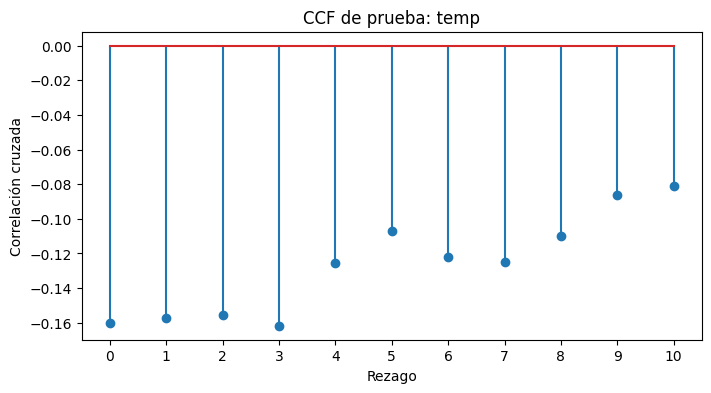

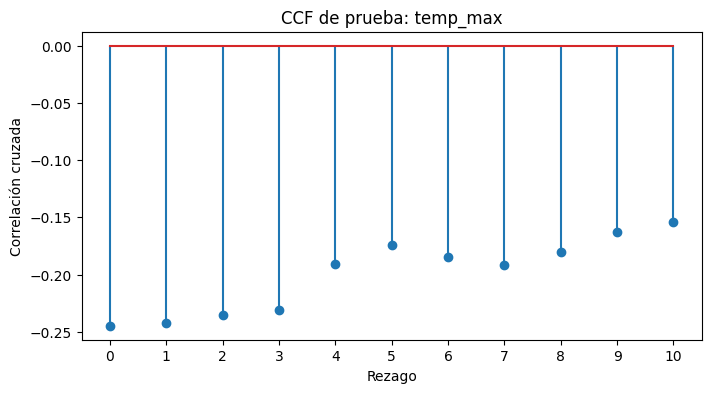

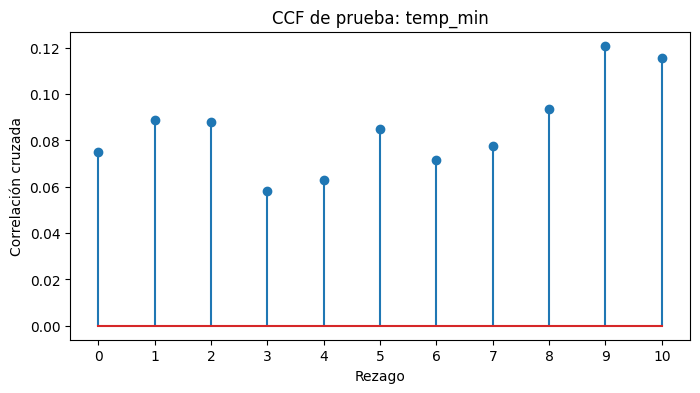

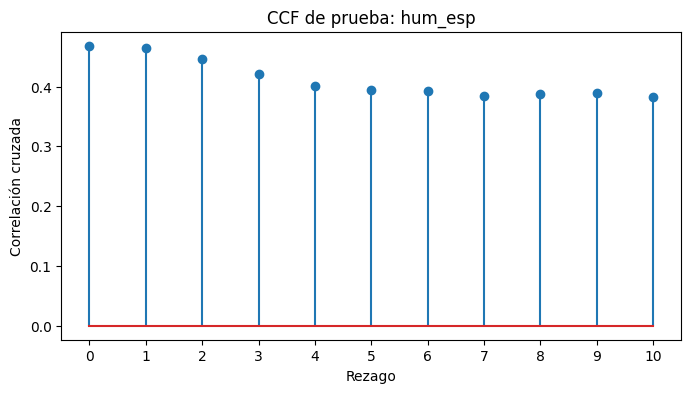

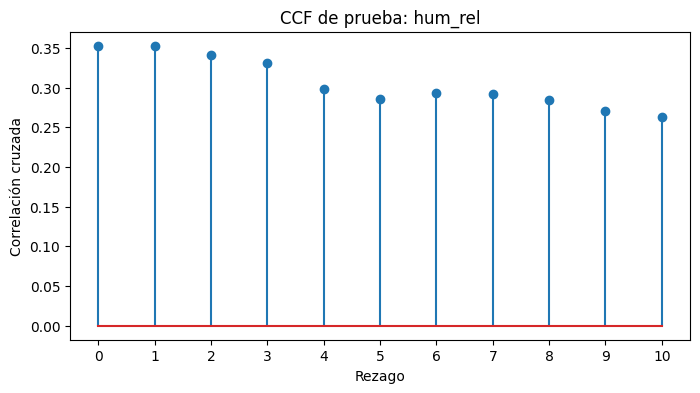

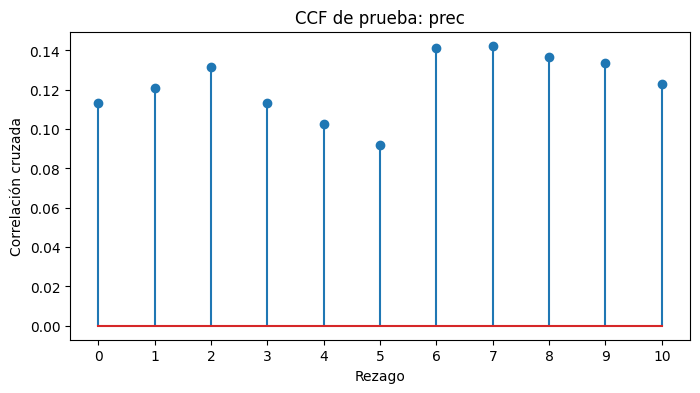

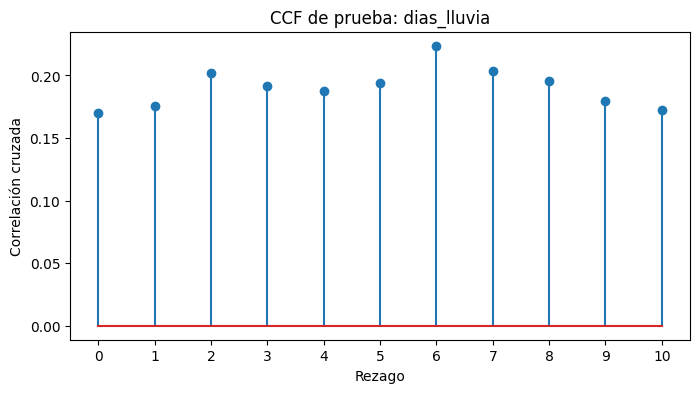

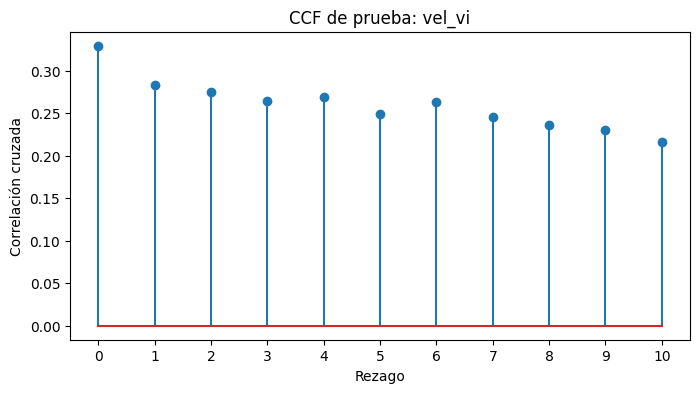

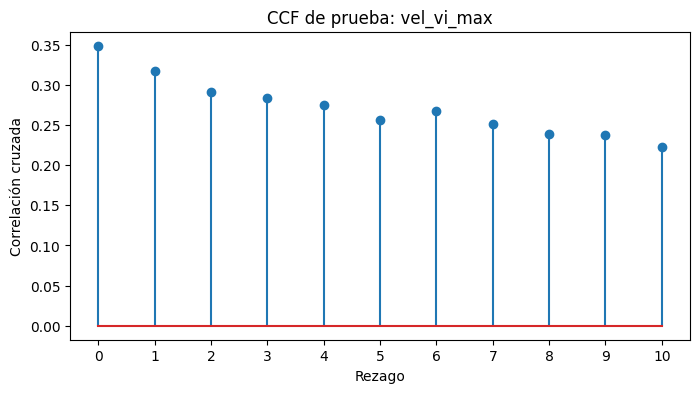

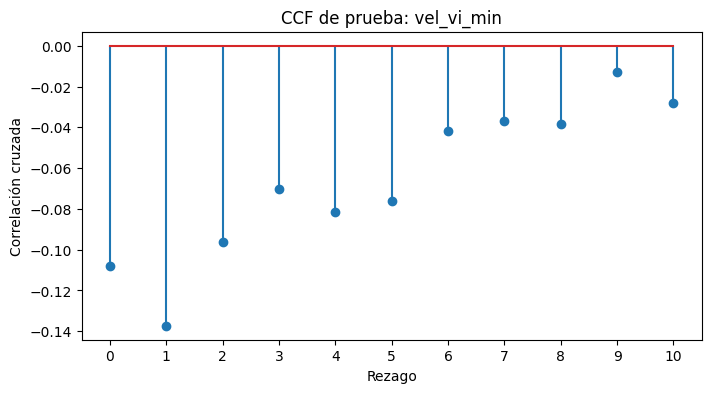

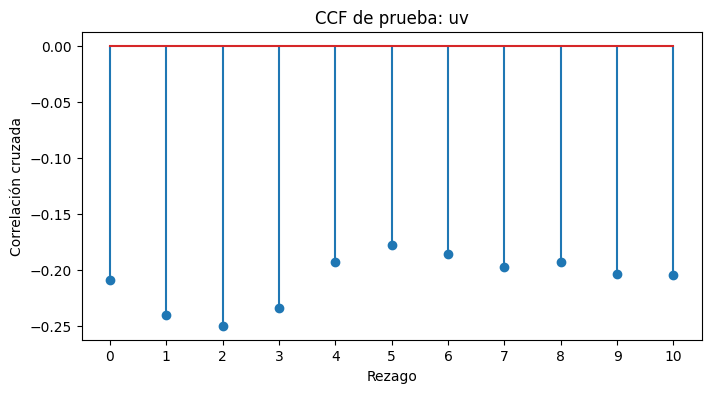

In [36]:
for var in variables: 
    ccf_test(df_final, var, max_lag=10)

# Tarea 

Completar a 11 atributos meteorológicos. 

Del gráfico anterior podemos decir que la humedad específica en las ultimas 4 semanas epidemiológicas esta muy correlacionada positivamente con la variable obetivo de casos de dengue.

Tarea  

Radactar interpretación. 

Del gráfico anterior podemos decir que la velocidad del viento específica en las ultimas 6 semanas epidemiológicas esta muy correlacionada positivamente con la variable obetivo de casos de dengue.